In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import pickle

In [4]:
df=pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/crops_class_kar.csv")

In [5]:
df.columns

Index(['ph', 'rainfall', 'sowing_temp', 'harvesting_temp', 'P', 'N', 'K',
       'crop'],
      dtype='object')

In [6]:
x=df.iloc[:,0:-1].values 
y=df.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)


Inputs shape  (7878, 7)
Outputs shape  (7878,)


In [7]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6302, 7)
(1576, 7)
(6302,)
(1576,)


In [8]:
acc = []
model = []

Random forest Accuracy is:  100.0
                       precision    recall  f1-score   support

            arhar/tur       1.00      1.00      1.00        90
                bajra       1.00      1.00      1.00        69
            coriander       1.00      1.00      1.00        70
         cotton(lint)       1.00      1.00      1.00        63
        cowpea(lobia)       1.00      1.00      1.00        20
         dry chillies       1.00      1.00      1.00        40
                 gram       1.00      1.00      1.00        90
            groundnut       1.00      1.00      1.00        99
                jowar       1.00      1.00      1.00        69
              linseed       1.00      1.00      1.00        55
              maize-k       1.00      1.00      1.00       106
              maize-r       1.00      1.00      1.00        90
    moong(green gram)       1.00      1.00      1.00        75
                onion       1.00      1.00      1.00        36
peas & beans (pulses

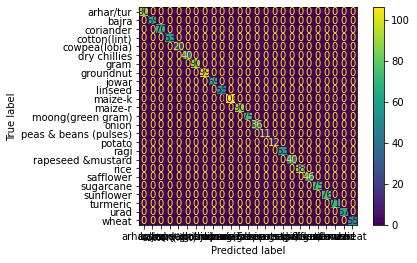

In [9]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay,ConfusionMatrixDisplay

classifier = RandomForestClassifier(n_estimators=65,random_state=2022)
classifier.fit(x_train,y_train)
y_pred_forest=classifier.predict(x_test)

predicted_values = y_pred_forest
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Random Forest')
print("Random forest Accuracy is: ", x*100)
matrix_plot=confusion_matrix(y_test, y_pred_forest, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred_forest))
#saving model
pickle.dump(classifier, open("/content/drive/MyDrive/github/collegeproject/pickle_files/forest_classifier.pkl", "wb"))

In [10]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(x_train,y_train)

predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))
#saving model
pickle.dump(DecisionTree, open("/content/drive/MyDrive/github/collegeproject/pickle_files/DecisionTree_classifier.pkl", "wb"))

DecisionTrees's Accuracy is:  99.30203045685279
                       precision    recall  f1-score   support

            arhar/tur       1.00      1.00      1.00        90
                bajra       1.00      1.00      1.00        69
            coriander       1.00      1.00      1.00        70
         cotton(lint)       1.00      1.00      1.00        63
        cowpea(lobia)       1.00      1.00      1.00        20
         dry chillies       1.00      1.00      1.00        40
                 gram       1.00      1.00      1.00        90
            groundnut       1.00      1.00      1.00        99
                jowar       1.00      1.00      1.00        69
              linseed       1.00      1.00      1.00        55
              maize-k       1.00      1.00      1.00       106
              maize-r       1.00      1.00      1.00        90
    moong(green gram)       1.00      1.00      1.00        75
                onion       1.00      1.00      1.00        36
peas &

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))
#saving model
pickle.dump(NaiveBayes, open("/content/drive/MyDrive/github/collegeproject/pickle_files/NaiveBayes_classifier.pkl", "wb"))

Naive Bayes's Accuracy is:  1.0
                       precision    recall  f1-score   support

            arhar/tur       1.00      1.00      1.00        90
                bajra       1.00      1.00      1.00        69
            coriander       1.00      1.00      1.00        70
         cotton(lint)       1.00      1.00      1.00        63
        cowpea(lobia)       1.00      1.00      1.00        20
         dry chillies       1.00      1.00      1.00        40
                 gram       1.00      1.00      1.00        90
            groundnut       1.00      1.00      1.00        99
                jowar       1.00      1.00      1.00        69
              linseed       1.00      1.00      1.00        55
              maize-k       1.00      1.00      1.00       106
              maize-r       1.00      1.00      1.00        90
    moong(green gram)       1.00      1.00      1.00        75
                onion       1.00      1.00      1.00        36
peas & beans (pulses) 

In [12]:
from sklearn.svm import SVC

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)

# transform testing dataabs
X_test_norm = norm.transform(x_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)

acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))
#saving the model
pickle.dump(SVM, open("/content/drive/MyDrive/github/collegeproject/pickle_files/SVM.pkl", "wb"))

SVM's Accuracy is:  1.0
                       precision    recall  f1-score   support

            arhar/tur       1.00      1.00      1.00        90
                bajra       1.00      1.00      1.00        69
            coriander       1.00      1.00      1.00        70
         cotton(lint)       1.00      1.00      1.00        63
        cowpea(lobia)       1.00      1.00      1.00        20
         dry chillies       1.00      1.00      1.00        40
                 gram       1.00      1.00      1.00        90
            groundnut       1.00      1.00      1.00        99
                jowar       1.00      1.00      1.00        69
              linseed       1.00      1.00      1.00        55
              maize-k       1.00      1.00      1.00       106
              maize-r       1.00      1.00      1.00        90
    moong(green gram)       1.00      1.00      1.00        75
                onion       1.00      1.00      1.00        36
peas & beans (pulses)       1.

In [13]:
#!pip uninstall xgboost 

#!pip install xgboost==0.90

In [14]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)

predicted_values = XB.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))
#saving the model
pickle.dump(XB, open("/content/drive/MyDrive/github/collegeproject/pickle_files/XB.pkl", "wb"))

XGBoost's Accuracy is:  0.9980964467005076
                       precision    recall  f1-score   support

            arhar/tur       1.00      1.00      1.00        90
                bajra       0.99      1.00      0.99        69
            coriander       1.00      1.00      1.00        70
         cotton(lint)       1.00      1.00      1.00        63
        cowpea(lobia)       0.95      1.00      0.98        20
         dry chillies       1.00      1.00      1.00        40
                 gram       1.00      1.00      1.00        90
            groundnut       0.99      1.00      0.99        99
                jowar       1.00      0.99      0.99        69
              linseed       1.00      1.00      1.00        55
              maize-k       1.00      1.00      1.00       106
              maize-r       1.00      1.00      1.00        90
    moong(green gram)       1.00      0.99      0.99        75
                onion       1.00      1.00      1.00        36
peas & bean

In [15]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

#saving the model
pickle.dump(LogReg, open("/content/drive/MyDrive/github/collegeproject/pickle_files/LogReg.pkl", "wb"))

Logistic Regression's Accuracy is:  0.9993654822335025
                       precision    recall  f1-score   support

            arhar/tur       1.00      1.00      1.00        90
                bajra       1.00      1.00      1.00        69
            coriander       1.00      1.00      1.00        70
         cotton(lint)       1.00      1.00      1.00        63
        cowpea(lobia)       1.00      1.00      1.00        20
         dry chillies       0.98      1.00      0.99        40
                 gram       1.00      1.00      1.00        90
            groundnut       1.00      1.00      1.00        99
                jowar       1.00      1.00      1.00        69
              linseed       1.00      1.00      1.00        55
              maize-k       1.00      1.00      1.00       106
              maize-r       1.00      1.00      1.00        90
    moong(green gram)       1.00      1.00      1.00        75
                onion       1.00      1.00      1.00        36

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
df.sample(n=20, random_state=2022)

,ph,rainfall,sowing_temp,harvesting_temp,P,N,K,crop
7440,6.615721,62.470435,26.993427,37.533454,14.474959,4.487176,12.714329,arhar/tur
6821,5.508080,12.899585,21.550484,20.877623,47.804828,11.008858,10.065957,rice
713,6.701217,66.252968,26.917445,30.050424,50.144465,19.073018,0.000000,gram
5188,6.380191,78.031574,27.751979,31.106984,53.123717,21.913831,0.000000,gram
2540,6.446107,43.029760,30.217814,24.873125,41.899920,27.473180,0.000000,bajra
4289,6.765469,52.798316,21.097431,18.336839,5.452305,11.344429,0.000000,urad
4501,5.907411,169.398621,25.067077,25.834307,65.735787,25.109036,13.979618,maize-r
5597,6.008852,92.351513,32.344803,22.174925,30.761486,11.508691,0.000000,cotton(lint)
733,6.584565,54.874241,29.317438,24.339454,6.902890,7.665390,10.175438,groundnut
5180,8.253895,9.343899,27.291131,23.076253,42.303613,0.000000,0.000000,coriander


In [20]:
#Loading and testing 

loaded_model=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/forest_classifier.pkl','rb'))

data = np.array([[7.192431,	64.184820	,25.213911	,39.031958	,16.030722	,4.027245,	12.696472]])
prediction = loaded_model.predict(data)
print(prediction)

['arhar/tur']
